## Multilayer Perceptron - Stochastic Gradient Descent

#### Husnu Melih Erdogan

In [1]:
import numpy
import pickle
import time
import matplotlib.pyplot as plt
from scipy.special import expit
import pandas as pd

%matplotlib inline
#Suppress Scientific Notation
numpy.set_printoptions(suppress=True)

In [2]:
# layer class
class Layer():
    # creates layers with given number of inputs and units (neurons)
    # random weights between -0.05 and 0.05
    def __init__(self, inputNumber, neuronNumber):
        self.weights = numpy.random.uniform(-0.02,0.02,(inputNumber, neuronNumber))
        self.bias = numpy.random.uniform(-0.02,0.02,(1, neuronNumber))

## A layer with 5 neurons and 2 inputs. (Hidden Layer)
Example:

Hidden Layer =
[-0.01334332,  0.01123723, -0.00299451,  0.01414014,  0.00258855]<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ 0.01819275, -0.01172095,  0.01891833,  0.00798791,  0.0084223 ]<br/><br/>

Hidden Layer Bias= [0.00814112,  0.01809999,  0.01832949,  0.01209556, -0.01409861]


![](img/layer.png)

## A layer with 1 neurons and 5 inputs. (Outpur Layer)
Example:

Output Layer =
[ 0.01754977]<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[-0.01653402]<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ 0.01448438]<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[-0.00082297]<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[-0.00214579]<br/>

Output Layer Bias = [0.00982127]

![](img/output.png)

In [3]:
# network class
class NeuralNetwork():
    def __init__(self, hidden, output, learning_rate, epoch, data_size):
        #variables and parameters used in the network
        #initilize the layers
        self.layer1 = hidden
        self.layer2 = output
        
        # set the learning rate
        self.lr = learning_rate
        
        #number of epochs for training
        self.epoch = epoch
        
        #size of the training data (number of examples used from the training data set)
        self.data_size = data_size
        
        #variables for the data sets
        self.train_data_set = None
        self.test_data_set = None
        
        #variables for the parsed data sets (inputs and labels(targets))
        #training
        self.training_inputs = None
        self.training_targets = None
        
        #testing
        self.test_inputs = None
        self.test_targets = None
        
        #accuracy
        self.train_acc = 0
        self.test_acc = 0
        self.all_train_accuracy = []
        self.all_test_accuracy = []
        
        # variables for plotting
        self.error_in = []
        self.error_out = []

In [4]:
class NeuralNetwork(NeuralNetwork):
    def plot_error(self):
        fig_error_in = plt.figure(figsize=(20, 10))
        plt.plot(self.error_in, label="Ein")
        plt.plot(self.error_out, label="Eout")
        plt.ylabel('Error')
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

In [5]:
class NeuralNetwork(NeuralNetwork):
    def Eout_calculate(self):
        Eout_all = []
        for i in range (self.test_inputs.shape[0]):
            inpt = self.test_inputs[i,:].reshape(1,2)
            trgt = numpy.asscalar(self.test_targets[i,:].reshape(1,1))
            layer1_outputs, layer2_output, z1, z2 = self.ForwardPropagation(inpt)
            Eout_all.append((trgt - layer2_output)**2)
        return numpy.mean(Eout_all)

In [6]:
class NeuralNetwork(NeuralNetwork):
    def plot_accuracy(self):
        fig_accuracy = plt.figure(figsize=(20, 10))
        plt.plot(self.all_train_accuracy, label="Training Dataset")
        plt.plot(self.all_test_accuracy, label="Test Dataset")
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

In [7]:
class NeuralNetwork(NeuralNetwork):
    def accuracy_calculate(self, targets, predictions):
        #number of correct classifications  
        correct = 0

        for i in range(len(predictions)):
            if targets[i] == predictions[i]:
                correct = correct + 1
                
        return correct / float(len(predictions)) * 100.0

In [8]:
class NeuralNetwork(NeuralNetwork):
    # accuracy calculation
    def accuracy(self, option, print_results):
        predictions = []
        targets = []
        
    # option 1 uses the train data set
        if option ==1:
            a = self.training_inputs
            b = self.training_targets

    # option 2 uses the test data set
        elif option ==2:
            a = self.test_inputs
            b = self.test_targets
        
    # Forward Propagation with traning/testing data set
        for i in range (len(a)):
            inpt = a[i,:].reshape(1,2)
            trgt = numpy.asscalar(b[i,:].reshape(1,1))
            
            layer1_outputs, layer2_output, z1, z2 = self.ForwardPropagation(inpt)
            
            if numpy.asscalar(layer2_output[0]) >= 0:
                p = 1
            else:
                p = -1
            
            predictions.append(p)
            targets.append(trgt)
        
    # Calcuate the accuracy of the network and return the value
        
        if option == 1:
            self.train_acc = self.accuracy_calculate(targets,predictions)
            
            if print_results:
                print ("train_data_acc:" + str(self.train_acc))
            
            return self.train_acc
                
        if option == 2:
            self.test_acc = self.accuracy_calculate(targets,predictions)
            
            if print_results:
                print ("test_data_acc:" + str(self.test_acc))
                
            return self.test_acc
        return True

## Training Data Set

![](img/inputs.png)

In [9]:
class NeuralNetwork(NeuralNetwork):
    # open the pickle file and loads values into object
    def pandas_open(self):
        #create data frame using pandas for training and testing data sets
        df_train = pd.read_csv('train.dat', sep='\s+', header=None, skiprows=0)
        df_test = pd.read_csv('test.dat', sep='\s+', header=None, skiprows=0)
        
        #shuffle the training data set
        df_train = df_train.sample(frac=1).reset_index(drop=True)
        
        #convert data frames to numpy array
        self.train_data_set = df_train.values
        self.test_data_set = df_test.values

        #separete training data from labels
        self.training_inputs = self.train_data_set[:, 0:2]
        self.training_targets = self.train_data_set[:, 2:3]

        #separete testing data from labels
        self.test_inputs = self.test_data_set[:, 0:2]
        self.test_targets = self.test_data_set[:, 2:3]

        return True

![](img/tanh.png)

In [10]:
class NeuralNetwork(NeuralNetwork):
    # tangent fucntion method
    def tanh_function(self, x):
        t = numpy.tanh(x)
        return t

![](img/dtanh.png)

In [11]:
class NeuralNetwork(NeuralNetwork):
    # method for the derivitive of tanh
    def tanh_function_derivative(self, x):
        dt =  1 - numpy.tanh(x)**2
        return dt

## Forward Propagation

![](img/forwardpropagation.png)

In [12]:
class NeuralNetwork(NeuralNetwork):
    # This method does the forward propagation
    # The neural network predicts, returns predictions for each class (0-1)
    def ForwardPropagation(self, inputs):
        
        #s = (X*w + bias)
        output_from_layer1 = numpy.dot(inputs, self.layer1.weights)
        output_from_layer1 = output_from_layer1 + self.layer1.bias
    
        z1 = output_from_layer1
        #output of layer 1 = thanh(s)
        output_from_layer1 = self.tanh_function(output_from_layer1)
        
        #s = (X*w + bias)
        output_from_layer2 = numpy.dot(output_from_layer1, self.layer2.weights)
        output_from_layer2 = output_from_layer2 + self.layer2.bias
        
        z2 = output_from_layer2
        #output = thanh(s)
        output_from_layer2 = self.tanh_function(output_from_layer2)
        
        return output_from_layer1, output_from_layer2, z1, z2

## Backpropagation

![](img/backpropagation.png)

## Phases of Backpropagation Algorithm

![](img/bp1.png)

In [13]:
class NeuralNetwork(NeuralNetwork):
    # this method does the traning-backpropgation
    def train(self):
        
        self.error_in = []
        self.error_out = []
        self.all_train_accuracy = []
        self.all_test_accuracy = []
        
        for j in range(self.epoch):
            all_error = []
            for i in range(self.training_inputs.shape[0]):
                # Forward Propagation with traning data
                training_inputs = self.training_inputs[i,:].reshape(1,2)
                layer1_outputs, layer2_output, z1, z2 = self.ForwardPropagation(training_inputs)
                
                # Get the label for the input
                training_target = self.training_targets[i,:].reshape(1,1)
                
                # Calculate the error
                error = (training_target - layer2_output)**2
                all_error.append(numpy.asscalar(error[0]))
                
                # Calculate the error and delta for output layer
                delta_outputlayer = 2* (layer2_output - training_target) * self.tanh_function_derivative(z2)

                # Calculate the error and delta for hidden layer
                layer1_error = delta_outputlayer * self.layer2.weights.T
                delta_hiddenlayer = layer1_error * self.tanh_function_derivative(z1)
                
                # Calculate the adjustments
                layer2_adjustment = layer1_outputs * delta_outputlayer * self.lr
                layer1_adjustment = numpy.outer(training_inputs.T, delta_hiddenlayer) * self.lr

                # Adjust the weights.
                self.layer1.weights = self.layer1.weights - layer1_adjustment
                self.layer2.weights = self.layer2.weights - layer2_adjustment.T

                # update bias weights for hidden layer and output layer
                layer1_bias_adjustment = delta_hiddenlayer * self.lr
                layer2_bias_adjustment = delta_outputlayer * self.lr

                # update the weights for bias
                self.layer1.bias = self.layer1.bias - layer1_bias_adjustment 
                self.layer2.bias = self.layer2.bias - layer2_bias_adjustment
            
            # calculate the accuracy of the network on the training and testing data sets
            self.all_train_accuracy.append(self.accuracy(1,0))
            self.all_test_accuracy.append(self.accuracy(2,0))
            
            # calculate Ein and Eout
            self.error_out.append(self.Eout_calculate())
            self.error_in.append(numpy.mean(all_error))
            
        # plot the calculated error and accuracy of the network
        self.plot_error()
        self.plot_accuracy()

## Experiments with Different Learning Rates

## Experiment 1 - Learning Rate = 0.01

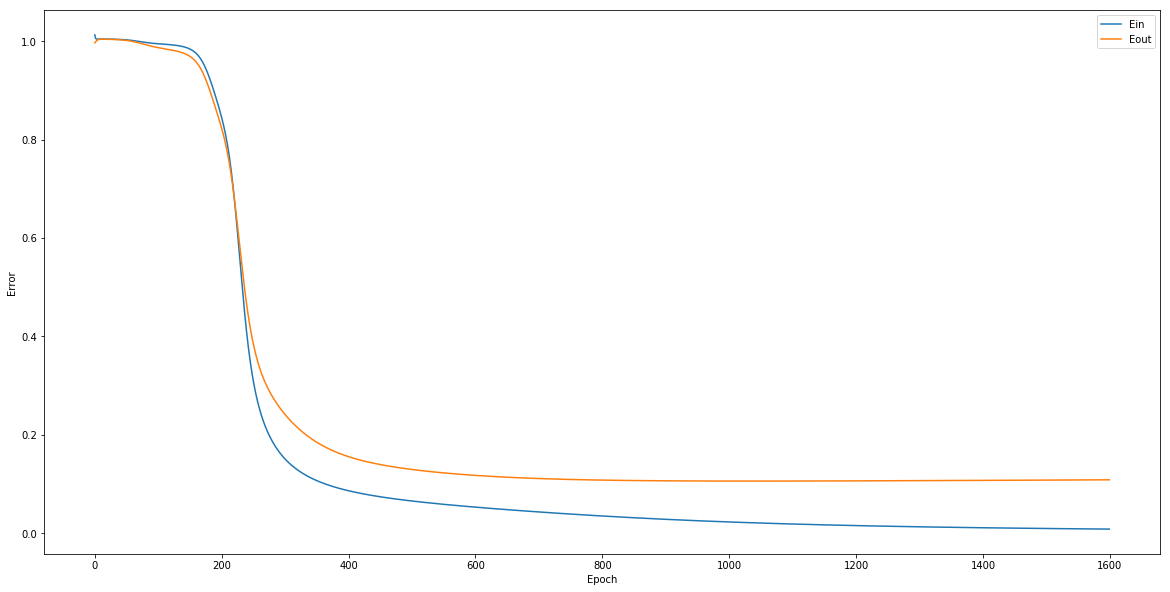

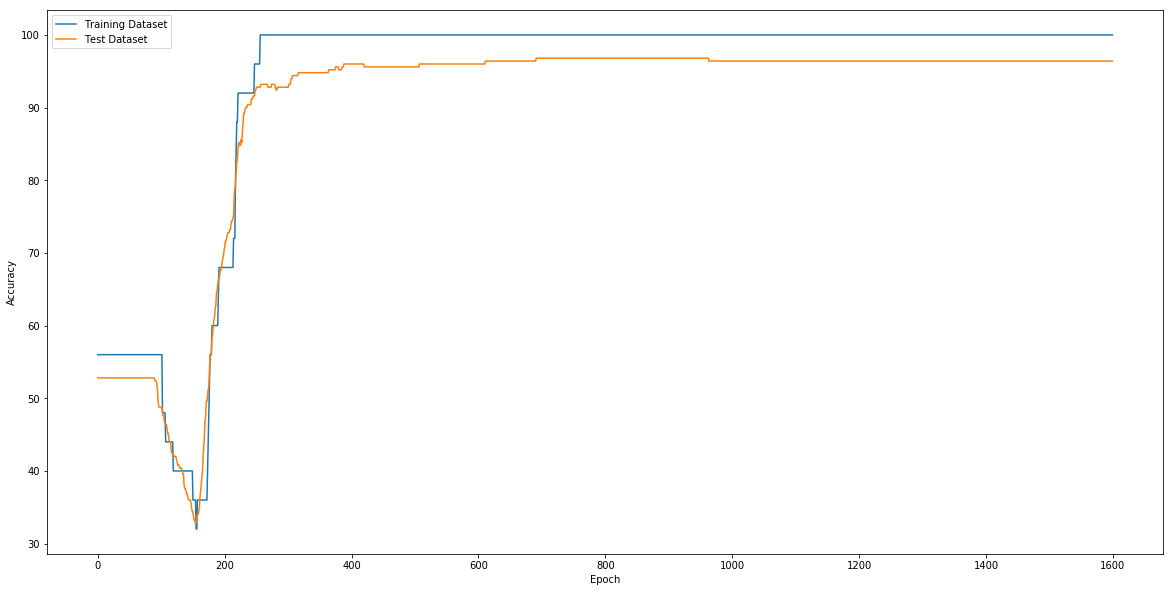

In [14]:
if __name__ == "__main__":
    #Experiment 1- 
    #experiment parameters
    number_of_inputs = 2
    number_of_hidden_layer_nodes = 5
    number_of_output_layer_nodes = 1
    number_of_epochs = 1600
    trainining_data_size = 25
    learning_rate = 0.01
    
    # Create layer 1 (n units, n inputs
    hidden1 = Layer(number_of_inputs, number_of_hidden_layer_nodes)
    
    # Create layer 2 (n units, n inputs)
    output1 = Layer(number_of_hidden_layer_nodes, number_of_output_layer_nodes)
    
    # Create a Neural Network by Combining the created Layers , 25 is the number of traning examples
    # None = momentum - it is 0 because it is not used in this example
    neural_network = NeuralNetwork(hidden1, output1, learning_rate, number_of_epochs, trainining_data_size)

    # load the traning data
    neural_network.pandas_open()

    # Train the neural network using the training set
    neural_network.train()

## Experiment 2 - Learning Rate = 0.1

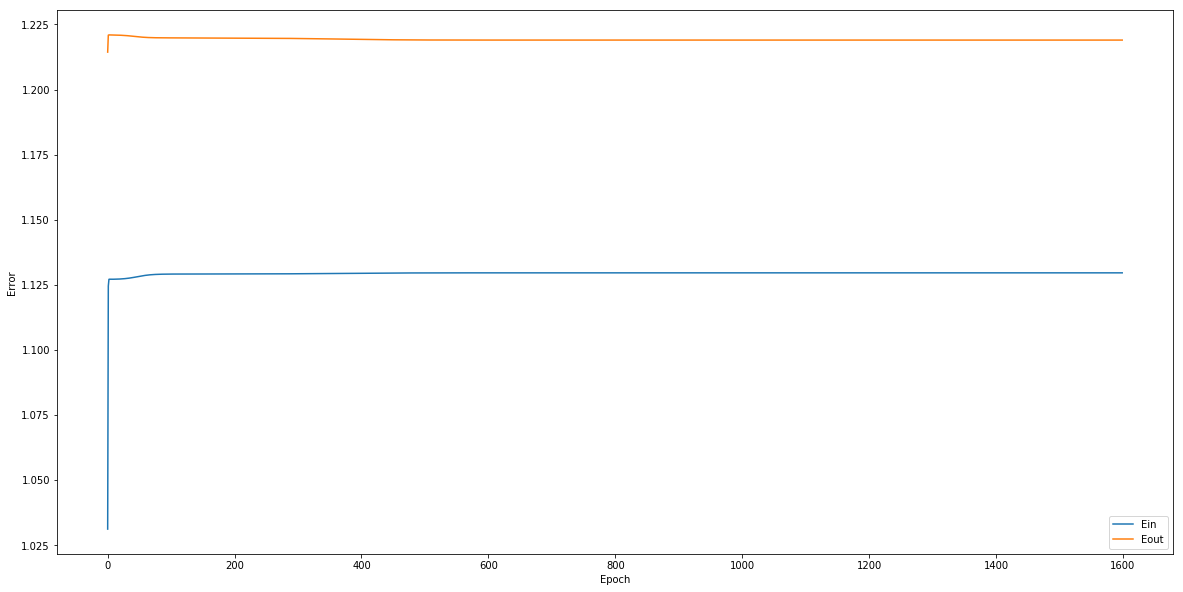

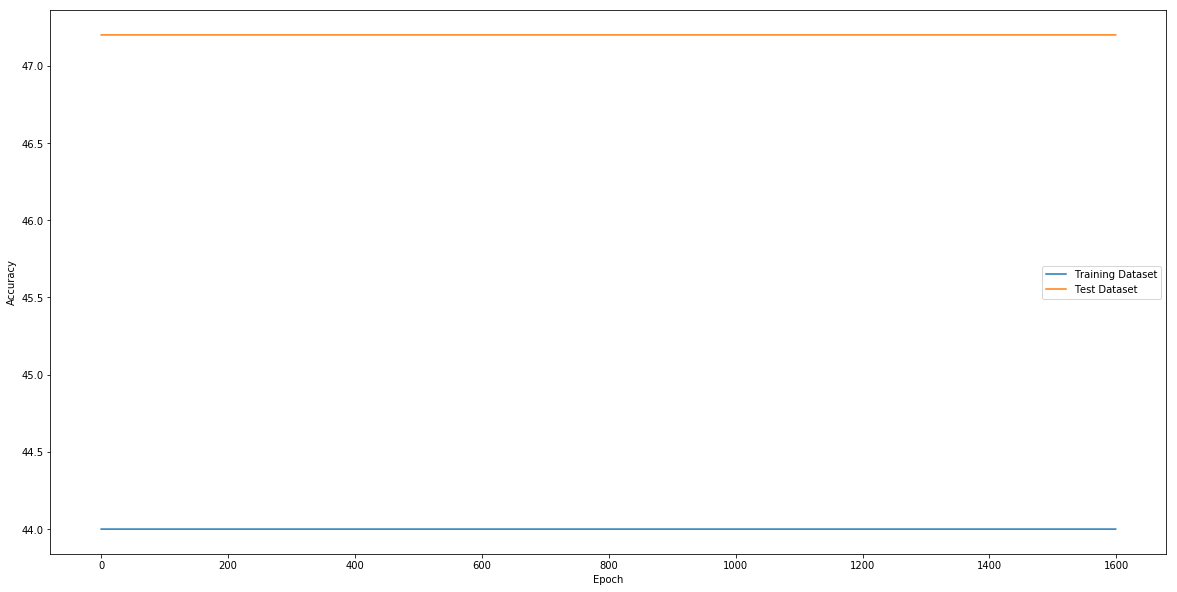

In [15]:
#Experiment 2- 
#experiment parameters
number_of_inputs = 2
number_of_hidden_layer_nodes = 5
number_of_output_layer_nodes = 1
number_of_epochs = 1600
trainining_data_size = 25
learning_rate = 0.1

# Create layer 1 (n units, n inputs
hidden2 = Layer(number_of_inputs, number_of_hidden_layer_nodes)

# Create layer 2 (n units, n inputs)
output2 = Layer(number_of_hidden_layer_nodes, number_of_output_layer_nodes)

# Create a Neural Network by Combining the created Layers , 25 is the number of traning examples
# None = momentum - it is 0 because it is not used in this example
neural_network = NeuralNetwork(hidden2, output2, learning_rate, number_of_epochs, trainining_data_size)

# load the traning data
neural_network.pandas_open()

# Train the neural network using the training set
neural_network.train()

## Experiment 3 - Learning Rate = 1

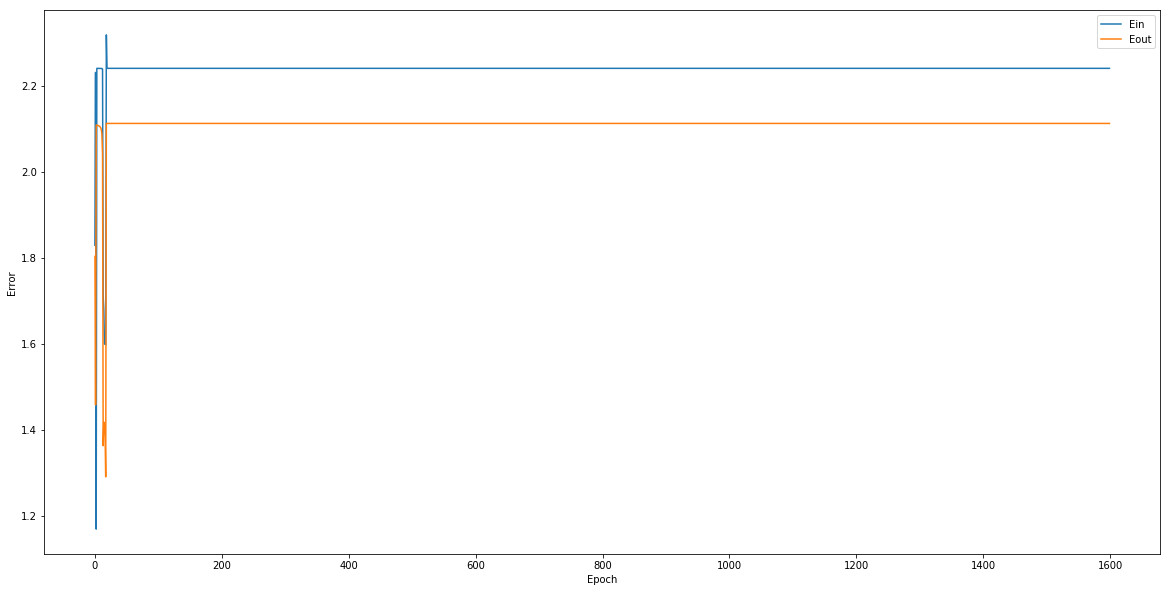

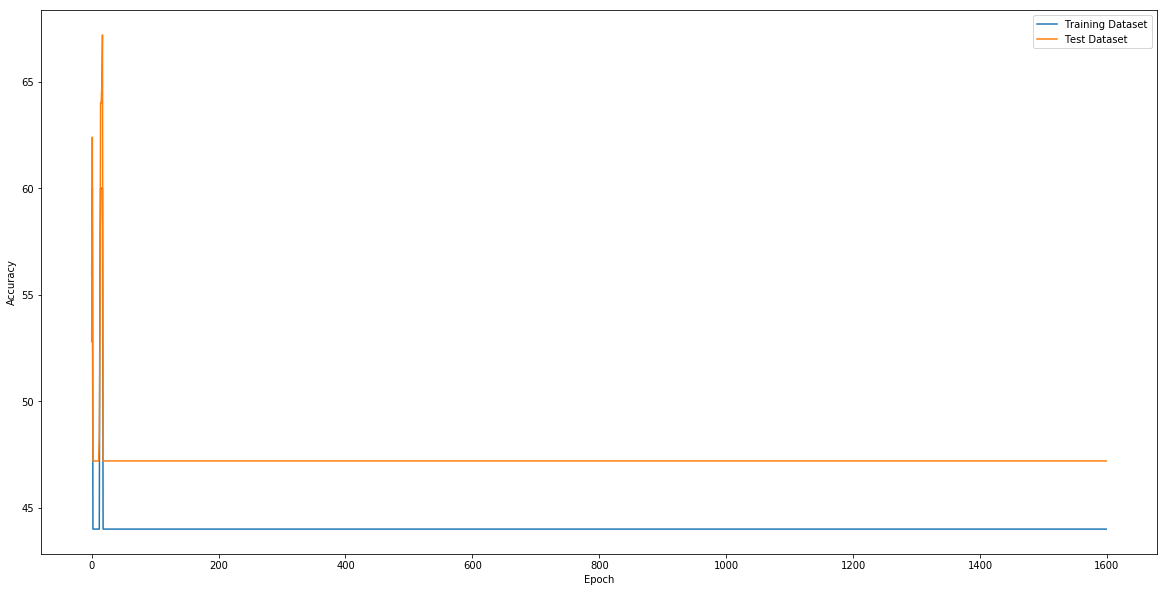

In [16]:
#Experiment 3- 
#experiment parameters
number_of_inputs = 2
number_of_hidden_layer_nodes = 5
number_of_output_layer_nodes = 1
number_of_epochs = 1600
trainining_data_size = 25
learning_rate = 1

# Create layer 1 (n units, n inputs
hidden3 = Layer(number_of_inputs, number_of_hidden_layer_nodes)

# Create layer 2 (n units, n inputs)
output3 = Layer(number_of_hidden_layer_nodes, number_of_output_layer_nodes)

# Create a Neural Network by Combining the created Layers , 25 is the number of traning examples
# None = momentum - it is 0 because it is not used in this example
neural_network = NeuralNetwork(hidden3, output3, learning_rate, number_of_epochs, trainining_data_size)

# load the traning data
neural_network.pandas_open()

# Train the neural network using the training set
neural_network.train()

## Experiments with Different Number of Neurons in the Hidden Layer

## Experiment 1 - number of hidden layer nodes = 5

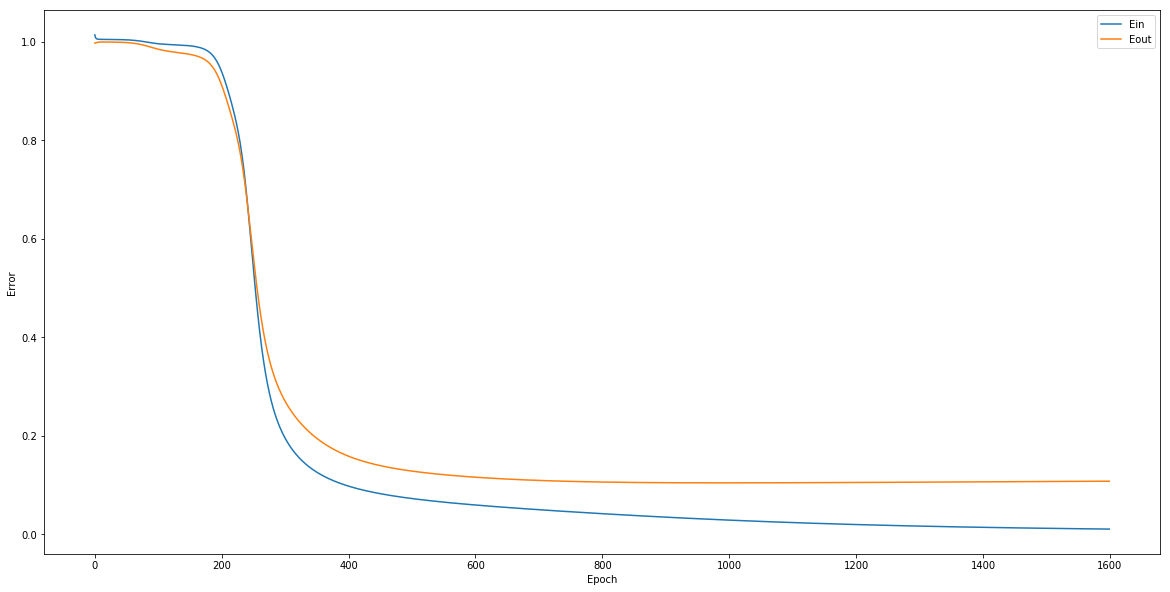

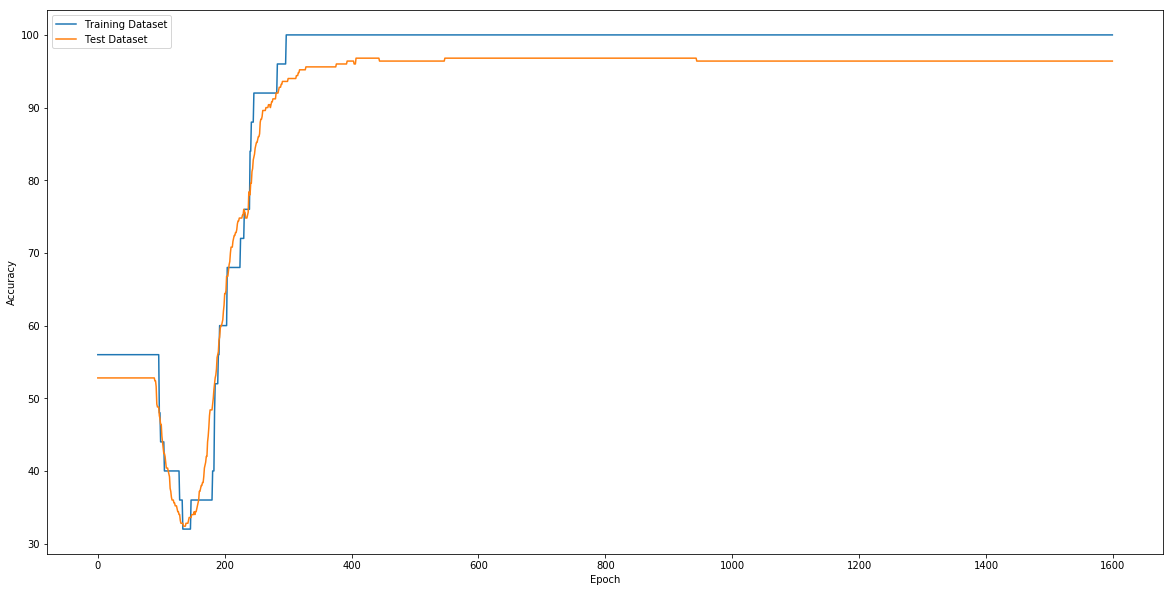

In [17]:
#Experiment 1- 
#experiment parameters
number_of_inputs = 2
number_of_hidden_layer_nodes = 5
number_of_output_layer_nodes = 1
number_of_epochs = 1600
trainining_data_size = 25
learning_rate = 0.01

# Create layer 1 (n units, n inputs
hidden4 = Layer(number_of_inputs, number_of_hidden_layer_nodes)

# Create layer 2 (n units, n inputs)
output4 = Layer(number_of_hidden_layer_nodes, number_of_output_layer_nodes)

# Create a Neural Network by Combining the created Layers , 25 is the number of traning examples
# None = momentum - it is 0 because it is not used in this example
neural_network = NeuralNetwork(hidden4, output4, learning_rate, number_of_epochs, trainining_data_size)

# load the traning data
neural_network.pandas_open()

# Train the neural network using the training set
neural_network.train()

## Experiment 2 - number of hidden layer nodes = 4

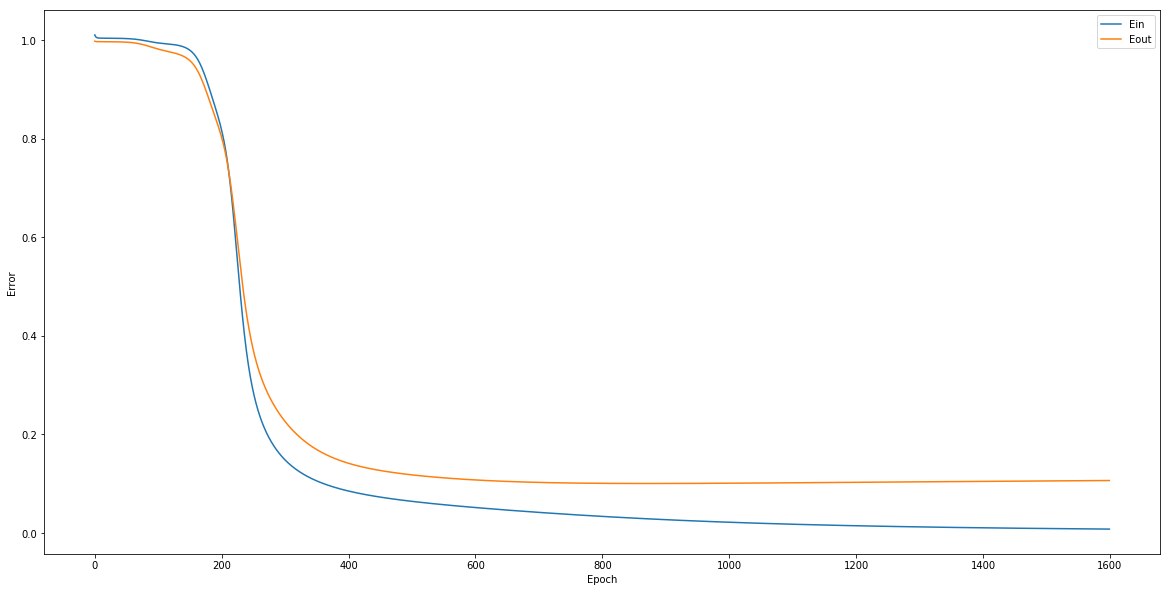

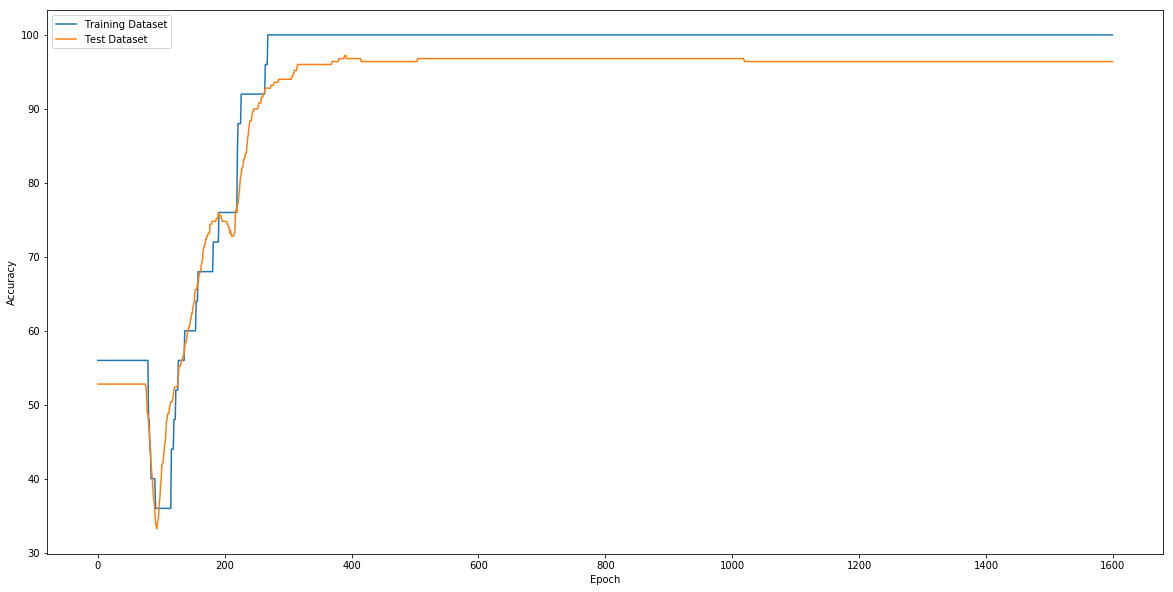

In [18]:
#Experiment 2- 
#experiment parameters
number_of_inputs = 2
number_of_hidden_layer_nodes = 4
number_of_output_layer_nodes = 1
number_of_epochs = 1600
trainining_data_size = 25
learning_rate = 0.01

# Create layer 1 (n units, n inputs
hidden5 = Layer(number_of_inputs, number_of_hidden_layer_nodes)

# Create layer 2 (n units, n inputs)
output5 = Layer(number_of_hidden_layer_nodes, number_of_output_layer_nodes)

# Create a Neural Network by Combining the created Layers , 25 is the number of traning examples
# None = momentum - it is 0 because it is not used in this example
neural_network2 = NeuralNetwork(hidden5, output5, learning_rate, number_of_epochs, trainining_data_size)

# load the traning data
neural_network2.pandas_open()

# Train the neural network using the training set
neural_network2.train()

## Experiment 3 - number of hidden layer nodes = 3

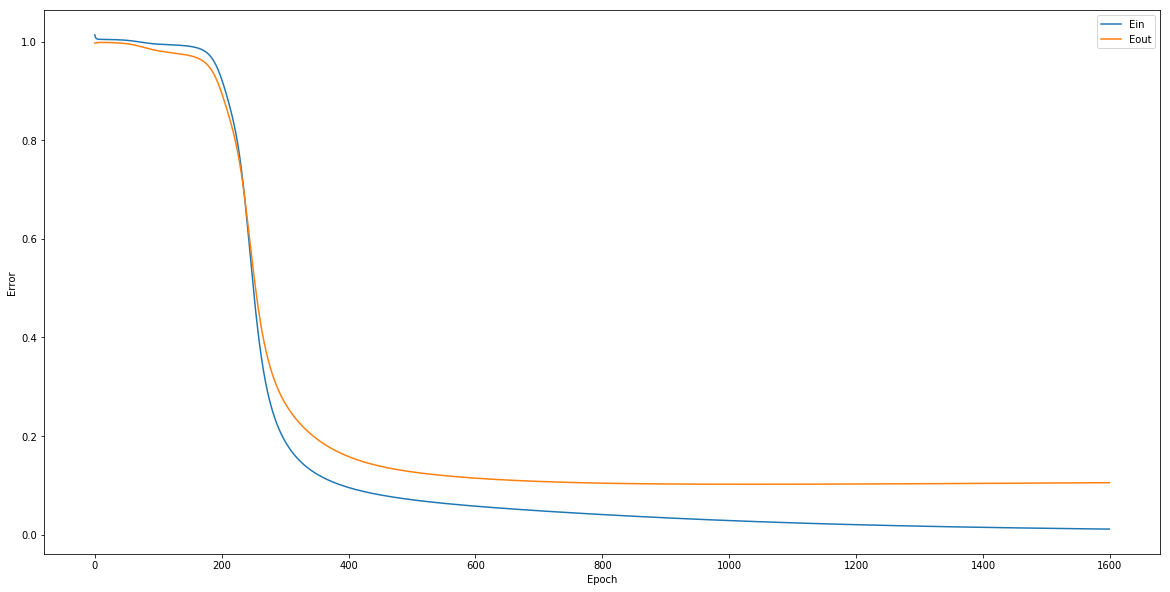

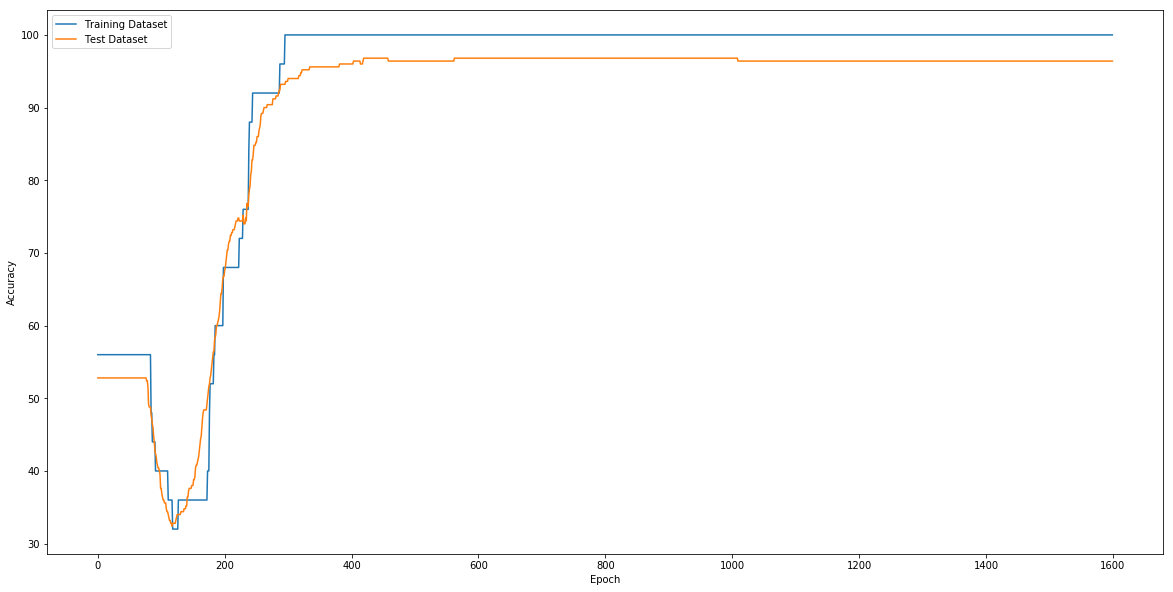

In [19]:
#Experiment 3- 
#experiment parameters
number_of_inputs = 2
number_of_hidden_layer_nodes = 3
number_of_output_layer_nodes = 1
number_of_epochs = 1600
trainining_data_size = 25
learning_rate = 0.01

# Create layer 1 (n units, n inputs
hidden6 = Layer(number_of_inputs, number_of_hidden_layer_nodes)

# Create layer 2 (n units, n inputs)
output6 = Layer(number_of_hidden_layer_nodes, number_of_output_layer_nodes)

# Create a Neural Network by Combining the created Layers , 25 is the number of traning examples
# None = momentum - it is 0 because it is not used in this example
neural_network3 = NeuralNetwork(hidden6, output6, learning_rate, number_of_epochs, trainining_data_size)

# load the traning data
neural_network3.pandas_open()

# Train the neural network using the training set
neural_network3.train()

## Experiment 4 - number of hidden layer nodes = 2

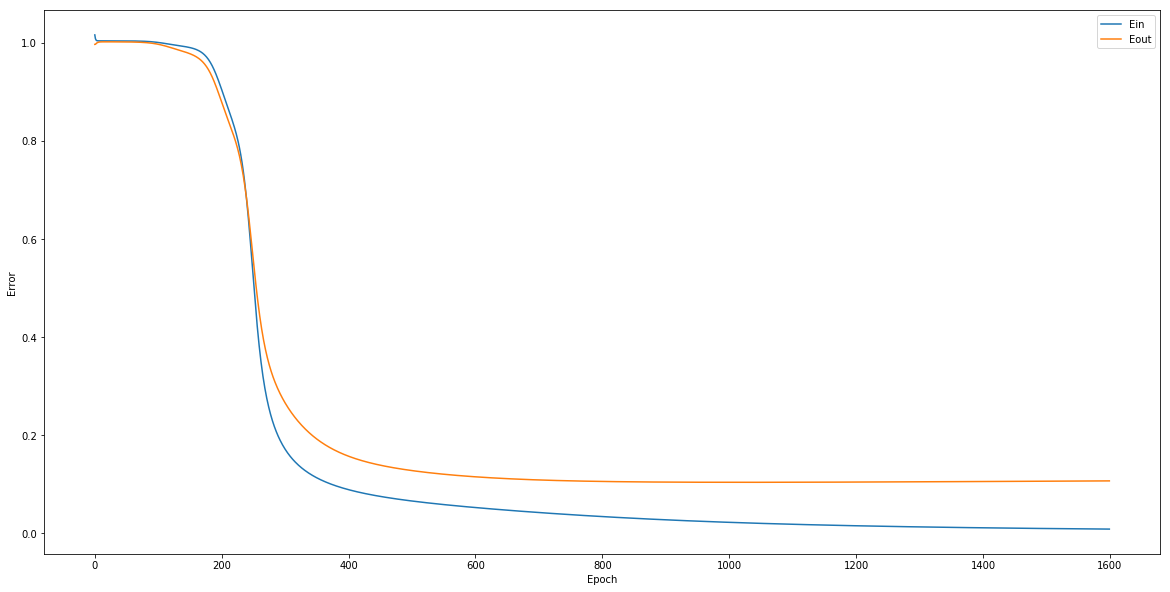

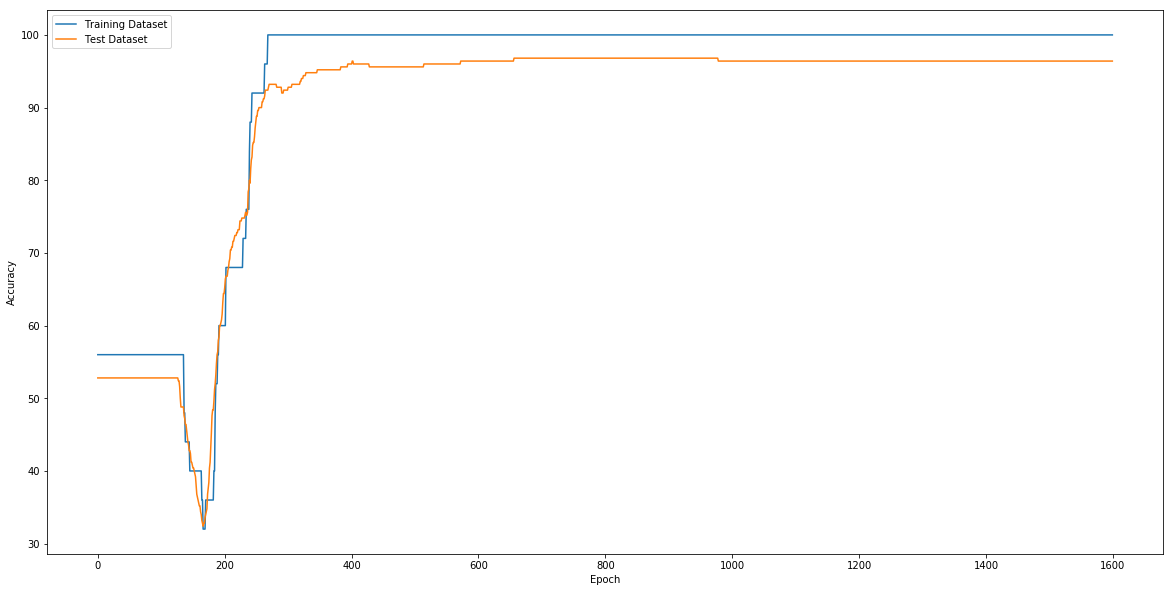

In [20]:
#Experiment 4- 
#experiment parameters
number_of_inputs = 2
number_of_hidden_layer_nodes = 2
number_of_output_layer_nodes = 1
number_of_epochs = 1600
trainining_data_size = 25
learning_rate = 0.01

# Create layer 1 (n units, n inputs
hidden7 = Layer(number_of_inputs, number_of_hidden_layer_nodes)

# Create layer 2 (n units, n inputs)
output7 = Layer(number_of_hidden_layer_nodes, number_of_output_layer_nodes)

# Create a Neural Network by Combining the created Layers , 25 is the number of traning examples
# None = momentum - it is 0 because it is not used in this example
neural_network3 = NeuralNetwork(hidden7, output7, learning_rate, number_of_epochs, trainining_data_size)

# load the traning data
neural_network3.pandas_open()

# Train the neural network using the training set
neural_network3.train()

## Experiment 5 - number of hidden layer nodes = 1

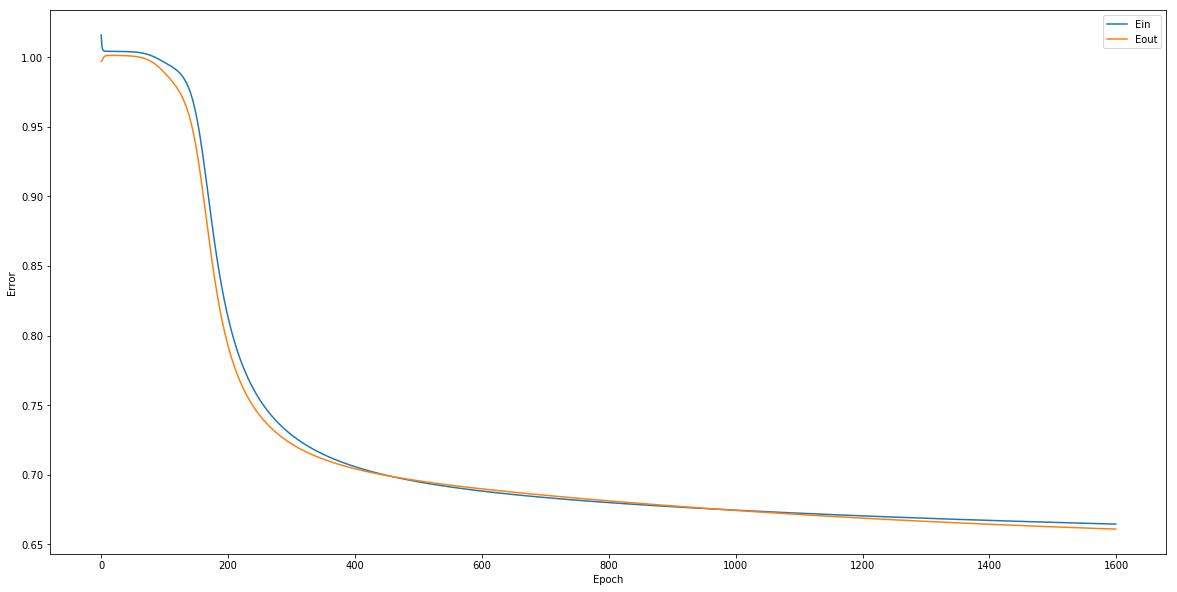

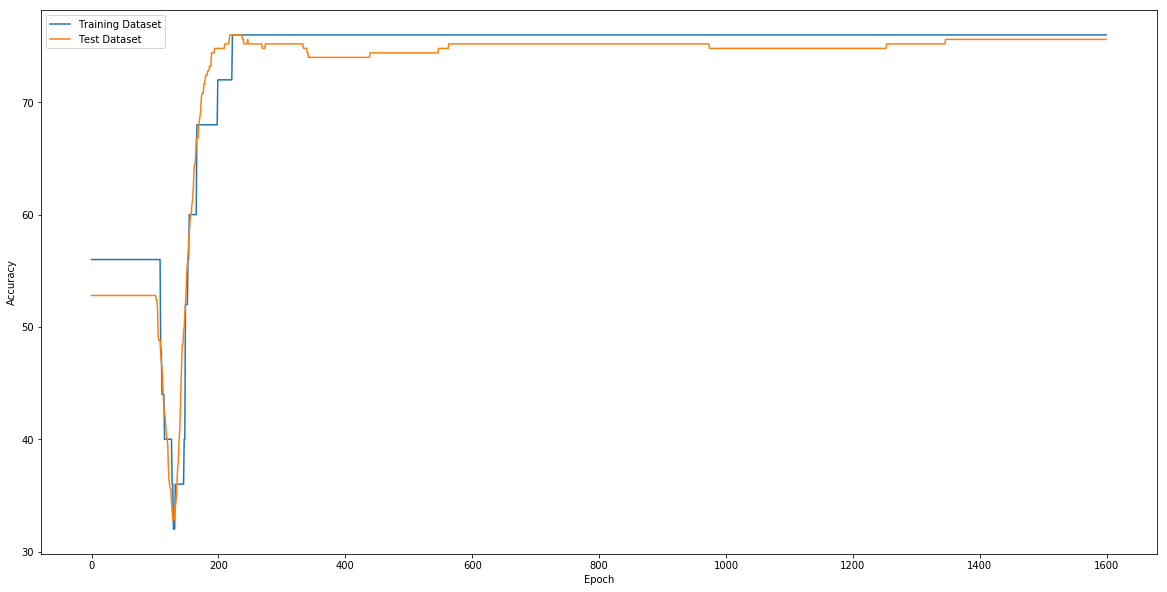

In [21]:
#Experiment 5- 
#experiment parameters
number_of_inputs = 2
number_of_hidden_layer_nodes = 1
number_of_output_layer_nodes = 1
number_of_epochs = 1600
trainining_data_size = 25
learning_rate = 0.01

# Create layer 1 (n units, n inputs
hidden8 = Layer(number_of_inputs, number_of_hidden_layer_nodes)

# Create layer 2 (n units, n inputs)
output8 = Layer(number_of_hidden_layer_nodes, number_of_output_layer_nodes)

# Create a Neural Network by Combining the created Layers , 25 is the number of traning examples
# None = momentum - it is 0 because it is not used in this example
neural_network3 = NeuralNetwork(hidden8, output8, learning_rate, number_of_epochs, trainining_data_size)

# load the traning data
neural_network3.pandas_open()

# Train the neural network using the training set
neural_network3.train()

References
- http://web.cecs.pdx.edu/~mm/MachineLearningWinter2019/NNs.pdf
- https://cs.anu.edu.au/courses/CSPROJECTS/17S2/reports/u5934839.pdf
- https://www.ini.rub.de/PEOPLE/wiskott/Teaching/Material/Backpropagation-LectureNotesPublic.pdf
- http://web.cecs.pdx.edu/~willke/courses/510/